## Setup for Runing in Google Colab

## 1. Data cleaning and simple Exploraty Data Analysis


### General data description

This dataset is designed to support research on adaptive learning systems, personalized education, and predictive student success modeling. It captures 15 variables with 10,000 interaction logs from online education platforms, including student engagement, quiz performance, learning preferences, and dropout likelihood.

In [ ]:
# load data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/Beta66688/JIANG-portfolio/main/personalized_learning_dataset.csv"
df = pd.read_csv(url)
df


,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,26,Female,Undergraduate,Machine Learning,162,2,87,27,73,Medium,68,Kinesthetic,2,No
9996,S09997,37,Male,Postgraduate,Machine Learning,447,2,39,10,68,Medium,46,Reading/Writing,1,Yes
9997,S09998,40,Female,Postgraduate,Machine Learning,105,4,50,23,41,High,64,Visual,1,No
9998,S09999,44,Male,High School,Python Basics,245,2,84,39,85,Medium,38,Visual,2,No


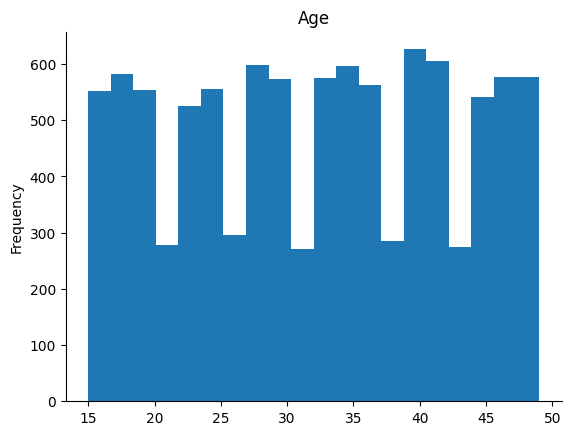

In [ ]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# preview the data
display(df.head())

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No


In [ ]:
df.shape

(10000, 15)

In [ ]:
df.columns.to_list()

['Student_ID',
 'Age',
 'Gender',
 'Education_Level',
 'Course_Name',
 'Time_Spent_on_Videos',
 'Quiz_Attempts',
 'Quiz_Scores',
 'Forum_Participation',
 'Assignment_Completion_Rate',
 'Engagement_Level',
 'Final_Exam_Score',
 'Learning_Style',
 'Feedback_Score',
 'Dropout_Likelihood']

In [ ]:
# Get Data Frame information (number of non-null values, data type etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  10000 non-null  object
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   Education_Level             10000 non-null  object
 4   Course_Name                 10000 non-null  object
 5   Time_Spent_on_Videos        10000 non-null  int64 
 6   Quiz_Attempts               10000 non-null  int64 
 7   Quiz_Scores                 10000 non-null  int64 
 8   Forum_Participation         10000 non-null  int64 
 9   Assignment_Completion_Rate  10000 non-null  int64 
 10  Engagement_Level            10000 non-null  object
 11  Final_Exam_Score            10000 non-null  int64 
 12  Learning_Style              10000 non-null  object
 13  Feedback_Score              10000 non-null  int

### Data quality checks:

Missing values: Identify and handle missing values.

Duplicate values: Check and handle duplicate records.

Outliers: Detect and handle outliers.(found: no obvious outliers)


In [ ]:
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Education_Level,0
Course_Name,0
Time_Spent_on_Videos,0
Quiz_Attempts,0
Quiz_Scores,0
Forum_Participation,0
Assignment_Completion_Rate,0


In [ ]:
df.duplicated().sum()

np.int64(0)

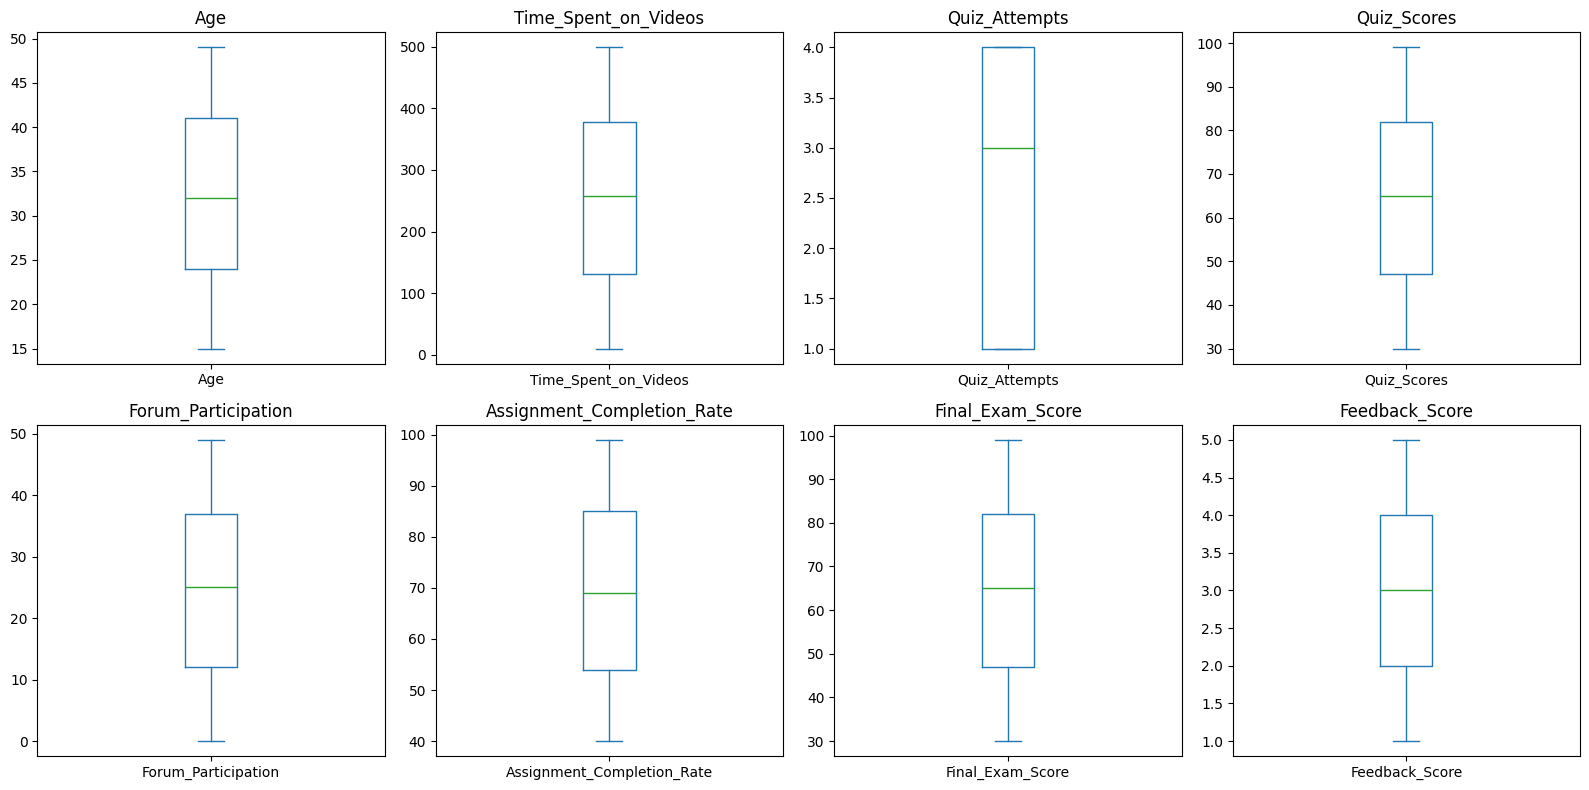

In [ ]:
# use box plots to visually inspect numerical variables for outliers
num_cols = [
 'Age',
 'Time_Spent_on_Videos',
 'Quiz_Attempts',
 'Quiz_Scores',
 'Forum_Participation',
 'Assignment_Completion_Rate',
 'Final_Exam_Score',
 'Feedback_Score']

# batch generate box plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
for i, col in enumerate(num_cols):
    df[col].plot.box(ax=axes[i//4, i%4])   # one row four figures
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

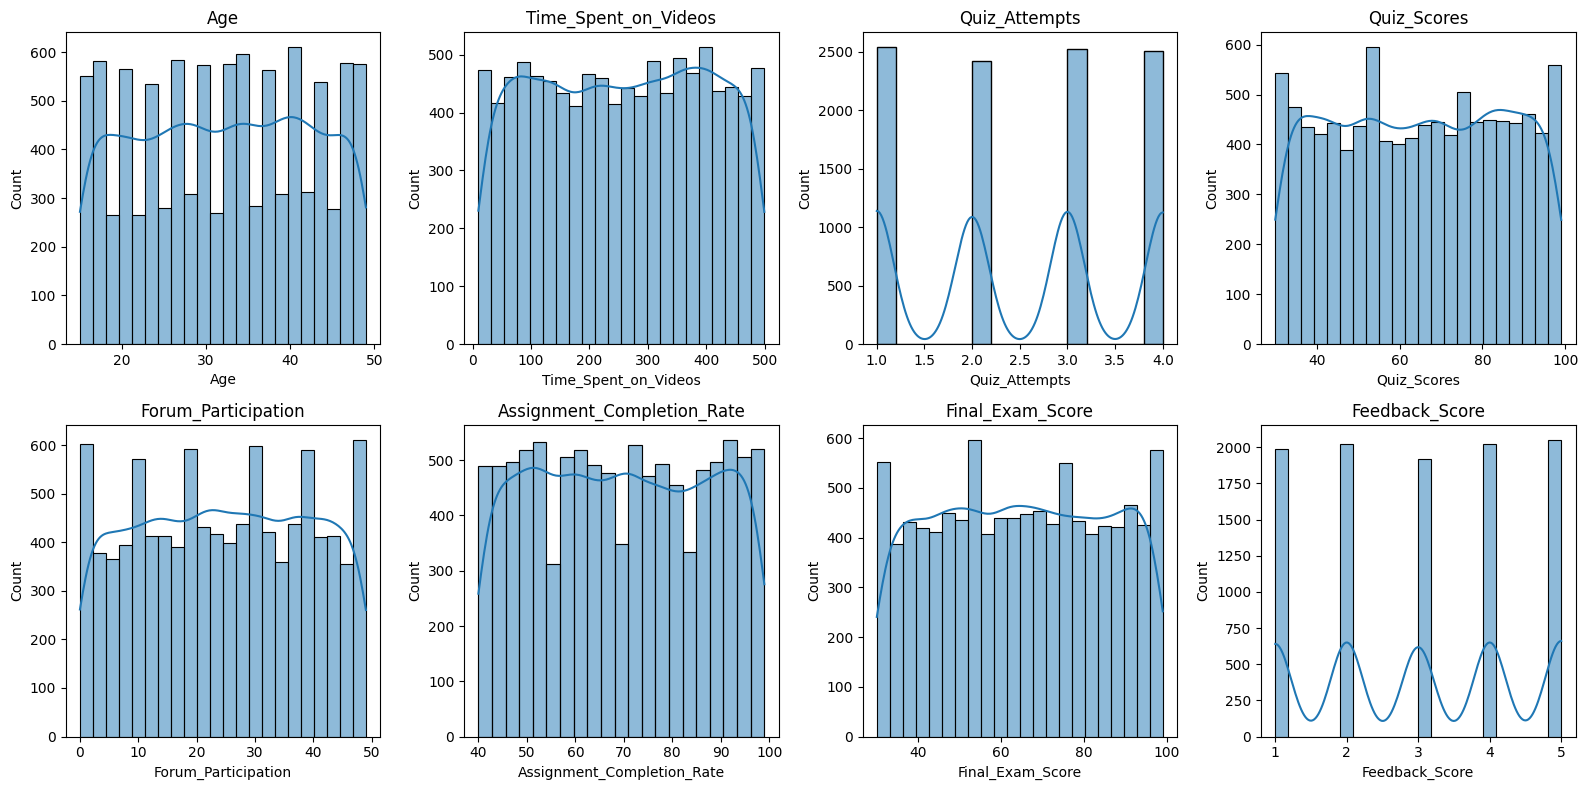

In [ ]:
# generate combined density and histogram plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i//4, i%4], kde=True, stat="count") # the height of the column represents the number of data points in each interval, not density
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

### Descriptive statistics:

Numerical variables: calculate mean, median, standard deviation, minimum, maximum, quartiles, etc.

Category variables: calculate frequency or proportion.

In [ ]:
# numerical variables
df.describe()

,Age,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Final_Exam_Score,Feedback_Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,32.137700,255.375400,2.500500,64.578600,24.616200,69.546800,64.697000,3.012600
std,10.062647,141.656392,1.122642,20.289125,14.330305,17.360782,20.096417,1.421423
min,15.000000,10.000000,1.000000,30.000000,0.000000,40.000000,30.000000,1.000000
25%,24.000000,131.000000,1.000000,47.000000,12.000000,54.000000,47.000000,2.000000
50%,32.000000,257.000000,3.000000,65.000000,25.000000,69.000000,65.000000,3.000000
75%,41.000000,378.000000,4.000000,82.000000,37.000000,85.000000,82.000000,4.000000
max,49.000000,499.000000,4.000000,99.000000,49.000000,99.000000,99.000000,5.000000


In [ ]:
# category variables
category_column = ['Gender','Education_Level','Course_Name','Engagement_Level','Learning_Style','Dropout_Likelihood']

for column in category_column:
  frequency_counts = df[column].value_counts()
  print(frequency_counts)
  print('===========================================')

Gender
Female    4886
Male      4699
Other      415
Name: count, dtype: int64
Education_Level
Undergraduate    5070
High School      2923
Postgraduate     2007
Name: count, dtype: int64
Course_Name
Machine Learning    2043
Cybersecurity       2026
Python Basics       1994
Data Science        1984
Web Development     1953
Name: count, dtype: int64
Engagement_Level
Medium    4927
High      2980
Low       2093
Name: count, dtype: int64
Learning_Style
Reading/Writing    2554
Visual             2525
Auditory           2478
Kinesthetic        2443
Name: count, dtype: int64
Dropout_Likelihood
No     8043
Yes    1957
Name: count, dtype: int64


### Data relationships:(challenged part)

Correlation analysis: Use correlation coefficients to analyze linear relationships between numerical variables. (There is no obvious correlation)

Group analysis: Identify potential groups or patterns in the data.

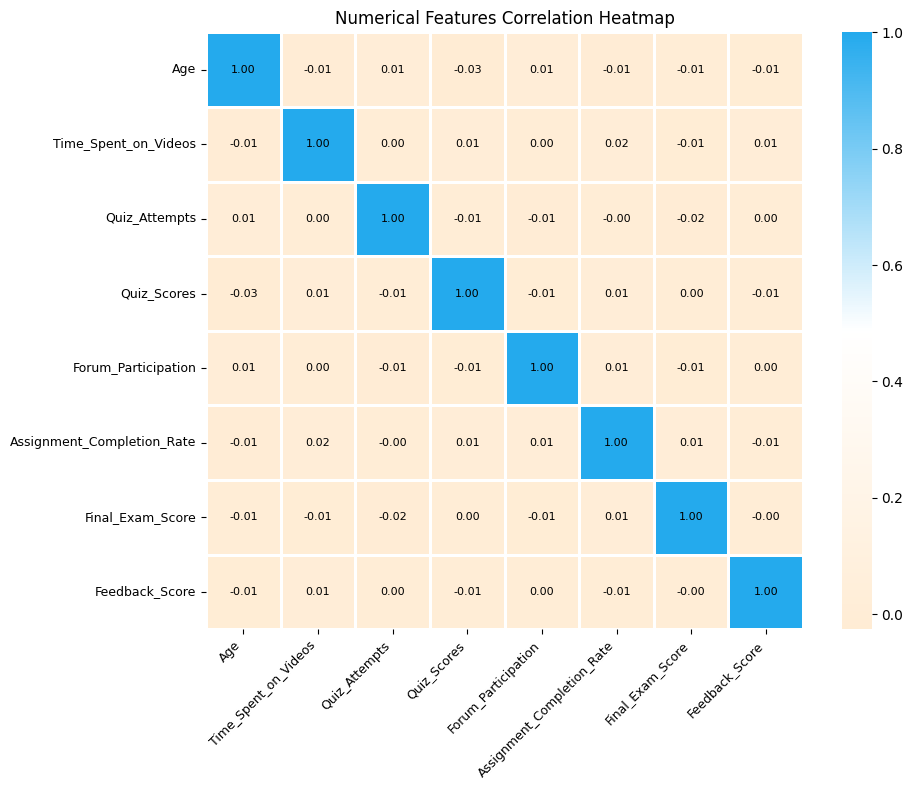

In [ ]:
# calculate correlation matrix
corr_matrix = df[num_cols].corr()

# visualization of correlation analysis
plt.figure(figsize=(10, 8))
color_heatmap = sns.blend_palette(["#FFECD4", "white", "#24AAED"], as_cmap=True)

sns.heatmap(corr_matrix,
            annot=True,
            cmap=color_heatmap,  # apply self setting color_heatmap
            linewidths=0.8,
            linecolor='white',
            annot_kws={"size": 8,"color": "black"},
            fmt=".2f",
            square=True)

plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)

plt.title('Numerical Features Correlation Heatmap')
plt.tight_layout()
plt.show()

Simply use data visualization as an example to partially display the non-intuitive data of categories and data variables, so as to further study the potential problems or models between the data.

<ipython-input-14-a75912ecafca>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Course_Name', y='Final_Exam_Score', data=course_means, palette='deep')


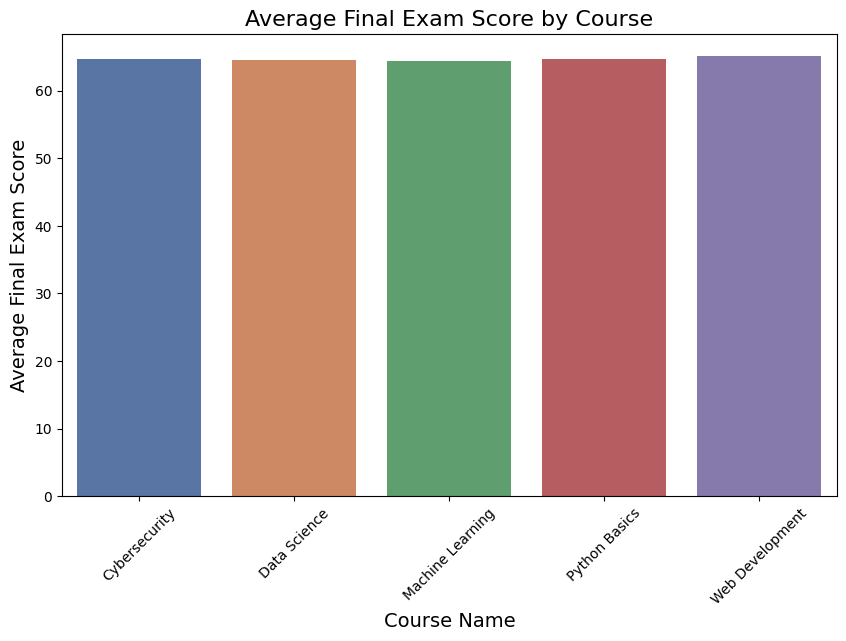

In [ ]:
# calculate the average Final_Exam_Score for each Course
course_means = df.groupby('Course_Name')['Final_Exam_Score'].mean().reset_index()

# use histogram plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Course_Name', y='Final_Exam_Score', data=course_means, palette='deep')

plt.title('Average Final Exam Score by Course', fontsize=16)
plt.xlabel('Course Name', fontsize=14)
plt.ylabel('Average Final Exam Score', fontsize=14)

plt.xticks(rotation=45)
plt.show()

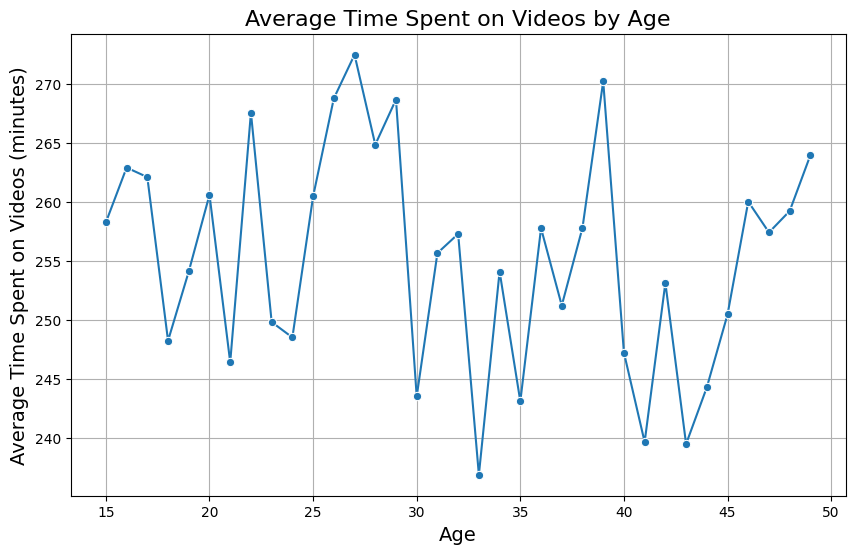

In [ ]:
# calculate the average Time_Spent_on_Videos for different ages
age_means = df.groupby('Age')['Time_Spent_on_Videos'].mean().reset_index()

# ctreate line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Time_Spent_on_Videos', data=age_means, marker='o')

plt.title('Average Time Spent on Videos by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Average Time Spent on Videos (minutes)', fontsize=14)

plt.grid()
plt.show()

### Finally generate hypotheses:

Based on the above observations of data characteristics and patterns, the following parts are potential research hypotheses or questions we propose, as well as further statistical analysis or model building attempts.

## 2. Data analyse

<Axes: xlabel='Final_Exam_Score', ylabel='Count'>

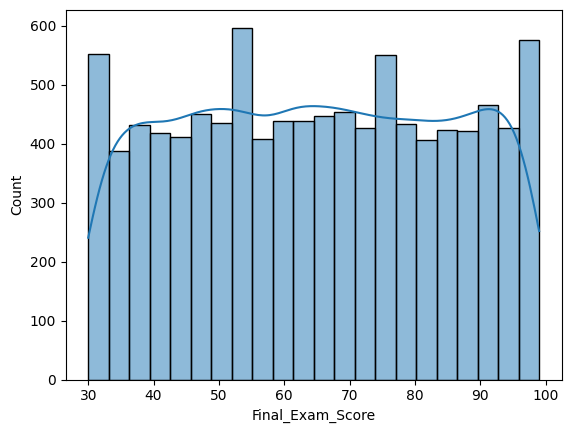

In [ ]:
sns.histplot(df['Final_Exam_Score'], kde=True)


###1. T-test: Dropout_Likelihood, which is the only dichotomous variable. Set α to .05. If it is less than α, it means the difference is significant.

In [ ]:
from scipy.stats import ttest_ind
import pandas as pd

def batch_t_tests(df, binary_cats, numeric_vars, alpha=0.05, min_group_size=5):
    results = []

    for cat in binary_cats:
        unique_vals = df[cat].dropna().unique()

        # Only binary variables are processed
        if len(unique_vals) != 2:
            continue

        val1, val2 = unique_vals

        for num in numeric_vars:
            group1 = df[df[cat] == val1][num].dropna()
            group2 = df[df[cat] == val2][num].dropna()

            if len(group1) < min_group_size or len(group2) < min_group_size:
                continue

            t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

            results.append({
                'Group Var': cat,
                'Group 1': val1,
                'Group 2': val2,
                'Numeric Var': num,
                'n1': len(group1),
                'n2': len(group2),
                't-stat': round(t_stat, 3),
                'p-value': round(p_value, 4),
                'Significant (p<0.05)': 'yes' if p_value < alpha else ''
            })

    return pd.DataFrame(results)

In [ ]:
binary_vars = [col for col in df.columns if df[col].nunique() == 2]
numeric_vars = ['Age', 'Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores',
                'Forum_Participation', 'Assignment_Completion_Rate',
                'Final_Exam_Score', 'Feedback_Score']


results_df = batch_t_tests(df, binary_vars, numeric_vars)
results_df

,Group Var,Group 1,Group 2,Numeric Var,n1,n2,t-stat,p-value,Significant (p<0.05)
0,Dropout_Likelihood,No,Yes,Age,8043,1957,1.240,0.2149,
1,Dropout_Likelihood,No,Yes,Time_Spent_on_Videos,8043,1957,-0.651,0.5151,
2,Dropout_Likelihood,No,Yes,Quiz_Attempts,8043,1957,-0.282,0.7782,
3,Dropout_Likelihood,No,Yes,Quiz_Scores,8043,1957,-1.447,0.1481,
4,Dropout_Likelihood,No,Yes,Forum_Participation,8043,1957,1.370,0.1709,
5,Dropout_Likelihood,No,Yes,Assignment_Completion_Rate,8043,1957,1.015,0.3103,
6,Dropout_Likelihood,No,Yes,Final_Exam_Score,8043,1957,-0.436,0.6629,
7,Dropout_Likelihood,No,Yes,Feedback_Score,8043,1957,-0.396,0.6919,


都不显著

###2.ANOVA：Relationships between univariate variables for non-binary variables

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def batch_anova(df, cat_vars, num_vars, alpha=0.05, min_group_size=5):
    results = []

    for cat in cat_vars:
        if df[cat].nunique() < 3:
            continue

        for num in num_vars:
            # Check if there is enough data
            groups = df[[cat, num]].dropna().groupby(cat)
            if any(len(g[1]) < min_group_size for g in groups):
                continue

            try:
                formula = f'Q("{num}") ~ C(Q("{cat}"))'
                model = smf.ols(formula, data=df).fit()
                anova_table = sm.stats.anova_lm(model, typ=2)
                f_val = anova_table['F'][0]
                p_val = anova_table['PR(>F)'][0]

                results.append({
                    'Category Var': cat,
                    'Numeric Var': num,
                    'F-stat': round(f_val, 3),
                    'p-value': round(p_val, 4),
                    'Significant (p<0.05)': 'yes' if p_val < alpha else ''
                })
            except Exception as e:
                print(f"skip {cat} - {num}，cuz error:{e}")
                continue

    return pd.DataFrame(results)

In [ ]:
# Multi-category categorical variables (3 or more categories)
multi_cat_vars = ['Gender', 'Education_Level', 'Engagement_Level', 'Learning_Style', 'Course_Name']

# Continuous variables
numeric_vars = ['Age', 'Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores',
                'Forum_Participation', 'Assignment_Completion_Rate',
                'Final_Exam_Score', 'Feedback_Score']

In [ ]:
anova_results = batch_anova(df, multi_cat_vars, numeric_vars)

<ipython-input-19-46179124460a>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_val = anova_table['F'][0]
<ipython-input-19-46179124460a>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = anova_table['PR(>F)'][0]
<ipython-input-19-46179124460a>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_val = anova_table['F'][0]
<ipython-input-19-46179124460a>:22: FutureWarning: Series.__getitem__ treating keys as positions is d

In [ ]:
anova_results

,Category Var,Numeric Var,F-stat,p-value,Significant (p<0.05)
0,Gender,Age,0.337,0.7139,
1,Gender,Time_Spent_on_Videos,0.881,0.4146,
2,Gender,Quiz_Attempts,2.199,0.1110,
3,Gender,Quiz_Scores,1.529,0.2169,
4,Gender,Forum_Participation,1.291,0.2749,
5,Gender,Assignment_Completion_Rate,1.793,0.1665,
6,Gender,Final_Exam_Score,0.935,0.3928,
7,Gender,Feedback_Score,0.011,0.9890,
8,Education_Level,Age,0.287,0.7505,
9,Education_Level,Time_Spent_on_Videos,0.018,0.9819,


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
def run_tukey_test(df, group_col, numeric_col, alpha=0.05, plot=True):
    subset = df[[group_col, numeric_col]].dropna()

    # run Tukey HSD
    tukey_result = pairwise_tukeyhsd(
        endog=subset[numeric_col],
        groups=subset[group_col],
        alpha=alpha
    )

    print(f" Tukey HSD result: {group_col} vs {numeric_col}")
    print(tukey_result.summary())

    return pd.DataFrame(
        tukey_result._results_table.data[1:],
        columns=tukey_result._results_table.data[0]
    )

In [ ]:
# 1. Engagement_Level vs Time_Spent_on_Videos
tukey_1 = run_tukey_test(df, 'Engagement_Level', 'Time_Spent_on_Videos')

# 2. Engagement_Level vs Feedback_Score
tukey_2 = run_tukey_test(df, 'Engagement_Level', 'Feedback_Score')

# 3. Learning_Style vs Age
tukey_3 = run_tukey_test(df, 'Learning_Style', 'Age')

# 4. Learning_Style vs Time_Spent_on_Videos
tukey_4 = run_tukey_test(df, 'Learning_Style', 'Time_Spent_on_Videos')

 Tukey HSD result: Engagement_Level vs Time_Spent_on_Videos
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  High    Low   9.3238 0.0547  -0.1438 18.7915  False
  High Medium   0.6847 0.9764  -7.0192  8.3886  False
   Low Medium  -8.6392 0.0508 -17.3007  0.0224  False
-----------------------------------------------------
 Tukey HSD result: Engagement_Level vs Feedback_Score
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  High    Low   0.0416 0.5599 -0.0534 0.1366  False
  High Medium   0.0924 0.0142  0.0151 0.1696   True
   Low Medium   0.0507 0.3575 -0.0362 0.1376  False
---------------------------------------------------
 Tukey HSD result: Learning_Style vs Age
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     

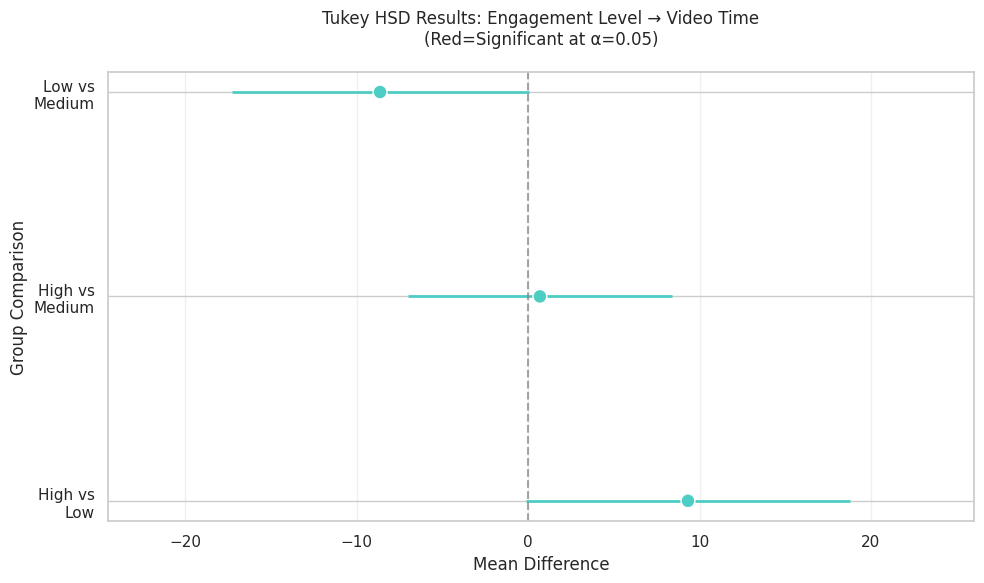

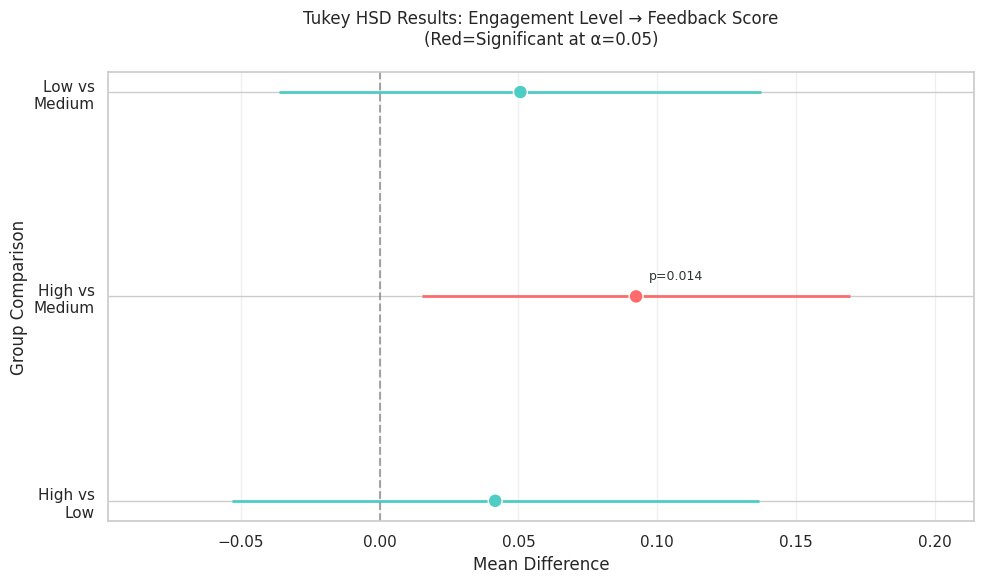

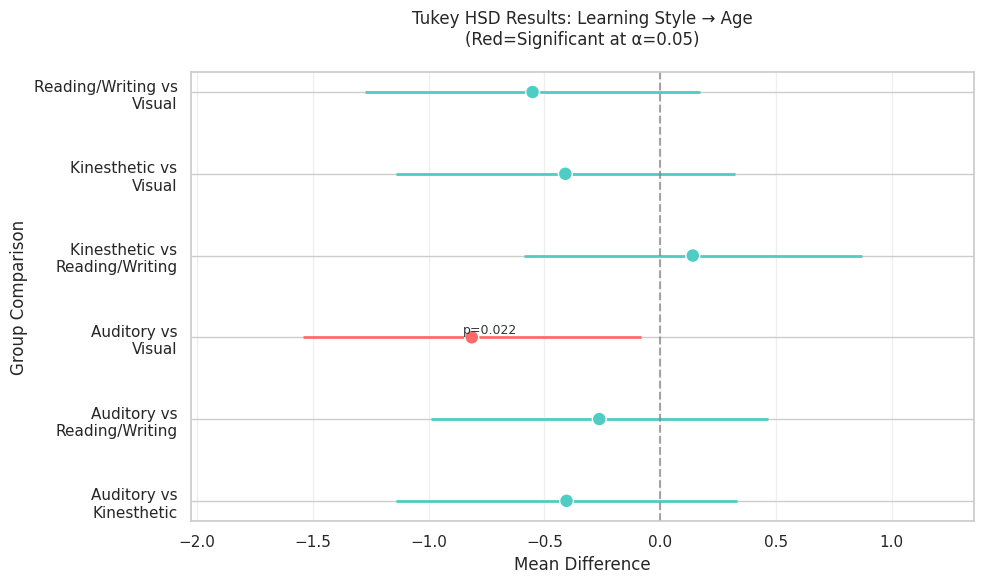

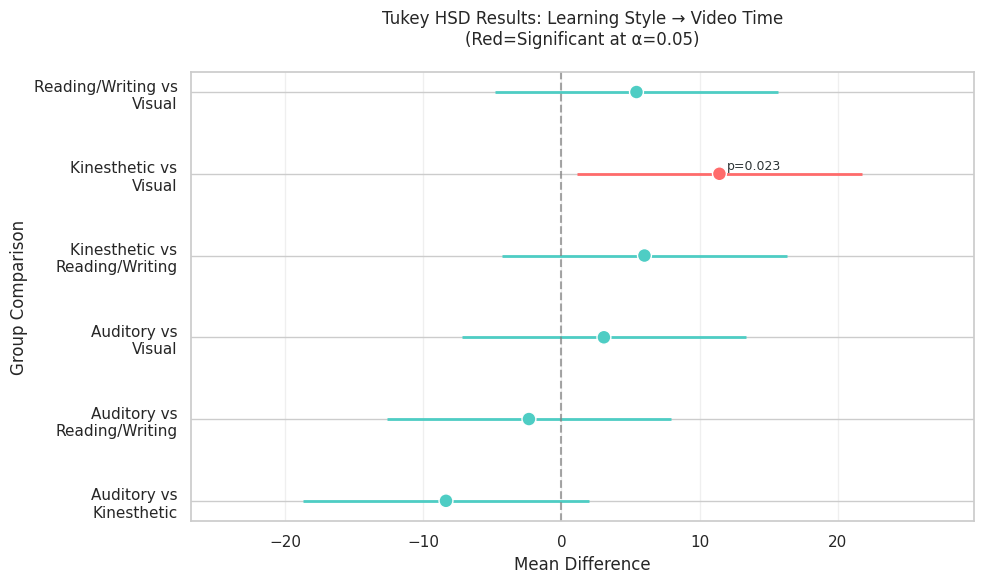

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme(style="whitegrid")
sns.set_palette("husl")

def plot_tukey_results(tukey_df, title):
    """可视化Tukey HSD检验结果"""
    plt.figure(figsize=(10, 6))

    # create label
    tukey_df['comparison'] = tukey_df['group1'] + " vs\n" + tukey_df['group2']

    # set color mapping
    colors = ['#FF6B6B' if x else '#4ECDC4' for x in tukey_df['reject']]

    # draw the figure
    plt.scatter(tukey_df['meandiff'],
                range(len(tukey_df)),
                s=100,
                c=colors,
                edgecolor='w',
                zorder=3)

    # plot error bars
    plt.hlines(y=range(len(tukey_df)),
               xmin=tukey_df['lower'],
               xmax=tukey_df['upper'],
               colors=colors,
               linewidth=2,
               zorder=2)

    # draw 0 line
    plt.axvline(0, color='gray', linestyle='--', alpha=0.7)

    # mark the significance
    for i, row in tukey_df.iterrows():
        if row['reject']:
            plt.text(row['meandiff']*1.05, i+0.1,
                     f"p={row['p-adj']:.3f}",
                     ha='left', va='center',
                     fontsize=9,
                     color='#2d3436')

    # set label and title
    plt.yticks(range(len(tukey_df)), tukey_df['comparison'])
    plt.title(f"Tukey HSD Results: {title}\n(Red=Significant at α=0.05)", pad=20)
    plt.xlabel("Mean Difference")
    plt.ylabel("Group Comparison")
    plt.grid(axis='x', alpha=0.3)

    # adjust range of x_axis
    buffer = 0.2 * (tukey_df['upper'].max() - tukey_df['lower'].min())
    plt.xlim(tukey_df['lower'].min()-buffer, tukey_df['upper'].max()+buffer)

    plt.tight_layout()
    plt.show()

# ======================
# visualize four outcome
# ======================

# 1. Engagement_Level vs Time_Spent_on_Videos
plot_tukey_results(tukey_1, "Engagement Level → Video Time")

# 2. Engagement_Level vs Feedback_Score
plot_tukey_results(tukey_2, "Engagement Level → Feedback Score")

# 3. Learning_Style vs Age
plot_tukey_results(tukey_3, "Learning Style → Age")

# 4. Learning_Style vs Time_Spent_on_Videos
plot_tukey_results(tukey_4, "Learning Style → Video Time")

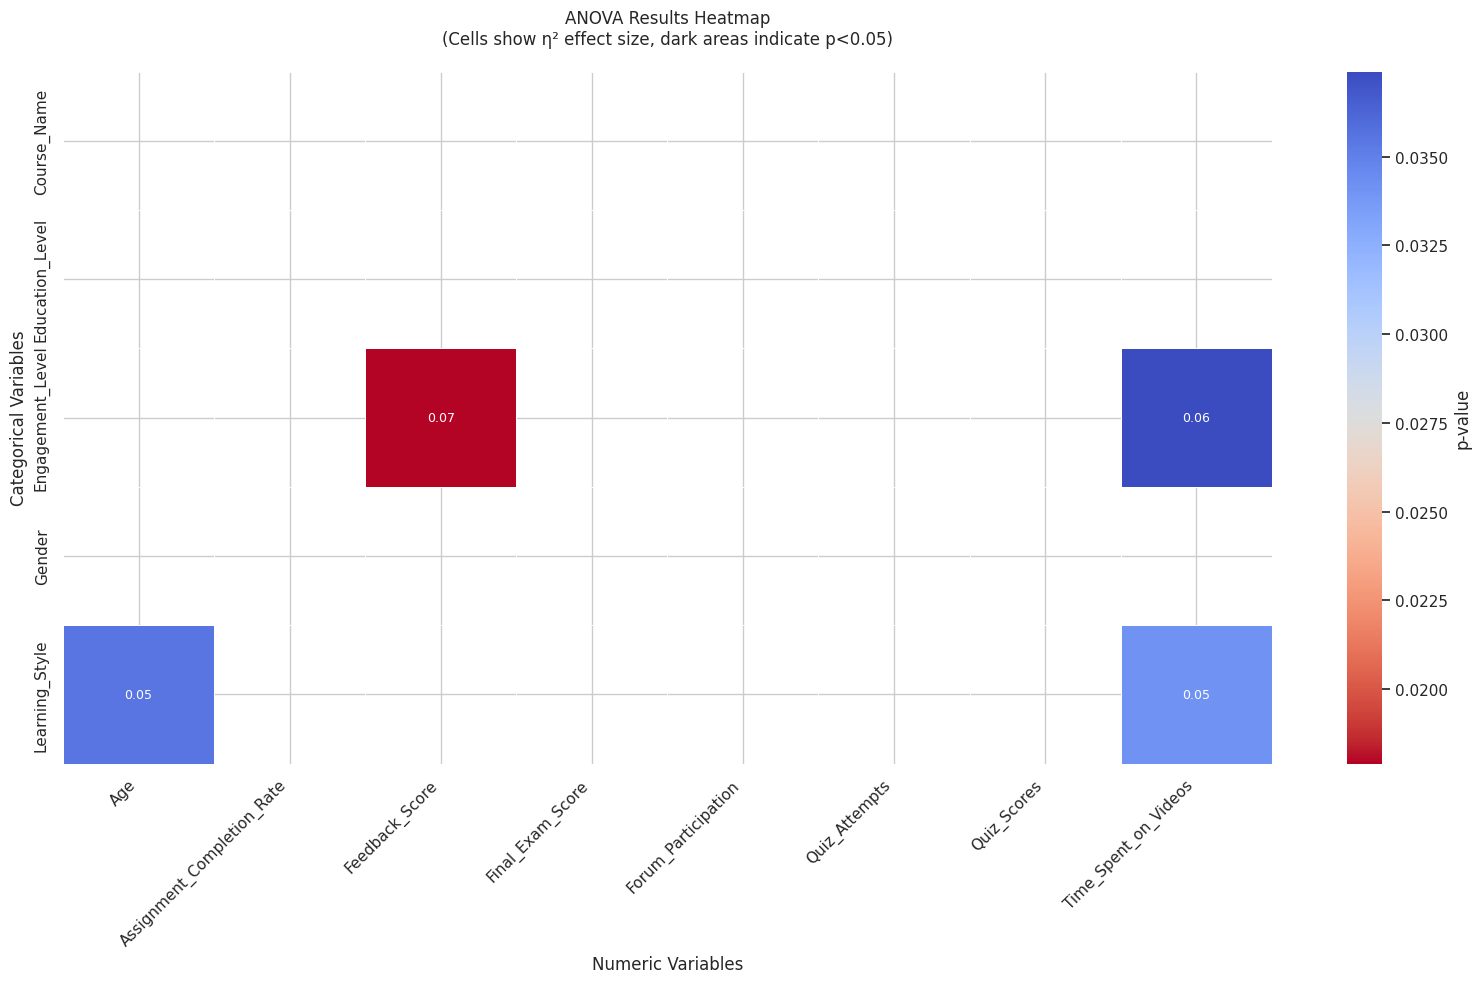

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# create data frame
data = {
    'Category Var': ['Education_Level'] * 8 + ['Engagement_Level'] * 8 + ['Learning_Style'] * 8 + ['Course_Name'] * 8,
    'Numeric Var': [
        'Age', 'Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores', 'Forum_Participation',
        'Assignment_Completion_Rate', 'Final_Exam_Score', 'Feedback_Score',
        'Age', 'Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores', 'Forum_Participation',
        'Assignment_Completion_Rate', 'Final_Exam_Score', 'Feedback_Score',
        'Age', 'Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores', 'Forum_Participation',
        'Assignment_Completion_Rate', 'Final_Exam_Score', 'Feedback_Score',
        'Age', 'Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores', 'Forum_Participation',
        'Assignment_Completion_Rate', 'Final_Exam_Score', 'Feedback_Score'
    ],
    'F-stat': [
        0.403, 0.066, 1.161, 0.222, 1.003, 1.141, 1.313, 0.039,
        1.345, 2.965, 1.094, 1.296, 0.759, 0.497, 0.499, 4.340,
        2.506, 3.227, 1.111, 1.249, 0.637, 0.963, 2.193, 2.323,
        1.205, 0.782, 0.939, 0.895, 1.376, 1.089, 0.260, 0.544
    ],
    'p-value': [
        0.6683, 0.9364, 0.3132, 0.8011, 0.3666, 0.3195, 0.2689, 0.9617,
        0.2606, 0.0516, 0.3351, 0.2736, 0.4681, 0.6081, 0.6070, 0.0131,
        0.0571, 0.0215, 0.3433, 0.2901, 0.5913, 0.4090, 0.0866, 0.0730,
        0.3062, 0.5364, 0.4402, 0.4656, 0.2395, 0.3599, 0.9037, 0.7037
    ],
    'Significant (p<0.05)': [
        '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', 'yes',
        '', 'yes', '', '', '', '', '', '',
        '', '', '', '', '', '', '', ''
    ]
}

df1 = pd.DataFrame(data)

# Create a pivot table for drawing heatmap
# Create heatmap data
heatmap_data = anova_results.pivot(
    index='Category Var',
    columns='Numeric Var',
    values='p-value'
)

# Create effect size data
heatmap_effect = anova_results.pivot(
    index='Category Var',
    columns='Numeric Var',
    values='F-stat'          # Use F value to approximate the effect size
).apply(lambda x: x/(x + 50))

# draw the heat map
plt.figure(figsize=(16, 10))
sns.heatmap(
    heatmap_data,
    annot=heatmap_effect.round(2),
    cmap='coolwarm_r',
    mask=heatmap_data > 0.05,
    cbar_kws={'label': 'p-value'},
    linewidths=.5,
    annot_kws={"size": 9}
)

plt.title("ANOVA Results Heatmap\n(Cells show η² effect size, dark areas indicate p<0.05)", pad=20)
plt.xlabel("Numeric Variables")
plt.ylabel("Categorical Variables")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3. Control variables + Multivariate synergy

#### Preprocessing

In [ ]:
#Ordinal
engagement_map = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

df['Engagement_Level_Ordinal'] = df['Engagement_Level'].map(engagement_map)

In [ ]:
df = df[df['Gender'].isin(['Male', 'Female'])].copy()
gender_map = {
    'Female': 0,
    'Male': 1
}
df['Gender_Binary'] = df['Gender'].map(gender_map)
df.head()

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood,Engagement_Level_Ordinal,Gender_Binary
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No,2,0
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No,2,1
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No,2,0
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No,3,0
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9585 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  9585 non-null   object
 1   Age                         9585 non-null   int64 
 2   Gender                      9585 non-null   object
 3   Education_Level             9585 non-null   object
 4   Course_Name                 9585 non-null   object
 5   Time_Spent_on_Videos        9585 non-null   int64 
 6   Quiz_Attempts               9585 non-null   int64 
 7   Quiz_Scores                 9585 non-null   int64 
 8   Forum_Participation         9585 non-null   int64 
 9   Assignment_Completion_Rate  9585 non-null   int64 
 10  Engagement_Level            9585 non-null   object
 11  Final_Exam_Score            9585 non-null   int64 
 12  Learning_Style              9585 non-null   object
 13  Feedback_Score              9585 non-null   int64 
 1

####I.Is there any significant relationship between video viewing time and Final Exam Score? (Controls for Age, Gender, Engagement_Level)

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


variables = ['Final_Exam_Score', 'Learning_Style', 'Age', 'Gender_Binary', 'Engagement_Level_Ordinal', 'Time_Spent_on_Videos']
df_clean = df[variables].dropna().copy()

# Standardize Time_Spent_on_Videos (core explanatory variable) and control variables
scaler = StandardScaler()
df_clean[['Time_Spent_on_Videos', 'Age']] = scaler.fit_transform(df_clean[['Time_Spent_on_Videos', 'Age']])

# List of control variables
control_vars = ['Gender_Binary', 'Engagement_Level_Ordinal', 'Age']

# Cycle Modeling
for control in control_vars:
    print(f"Model: Control {control}, explaining the effect of Time_Spent_on_Videos on Final_Exam_Score")

    X = df_clean[['Time_Spent_on_Videos', control]]
    X = sm.add_constant(X)
    y = df_clean['Final_Exam_Score']

    model = sm.OLS(y, X).fit()

    coef = model.params['Time_Spent_on_Videos']
    pval = model.pvalues['Time_Spent_on_Videos']
    print(f"→ Time_Spent_on_Videos coefficient：{coef:.4f}, p value: {pval:.4f}")
    print(model.summary())

Model: Control Gender_Binary, explaining the effect of Time_Spent_on_Videos on Final_Exam_Score
→ Time_Spent_on_Videos coefficient：-0.1543, p value: 0.4511
                            OLS Regression Results                            
Dep. Variable:       Final_Exam_Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6252
Date:                Fri, 02 May 2025   Prob (F-statistic):              0.535
Time:                        13:41:26   Log-Likelihood:                -42335.
No. Observations:                9585   AIC:                         8.468e+04
Df Residuals:                    9582   BIC:                         8.470e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t 

 #### II.Is there any significant relationship between engagement level and Final Exam Score? (Controls for Age, Gender, Time_Spent_on_Videos)

In [ ]:
scaler = StandardScaler()
df_clean[['Age', 'Time_Spent_on_Videos']] = scaler.fit_transform(df_clean[['Age', 'Time_Spent_on_Videos']])

control_vars = ['Age', 'Gender_Binary', 'Time_Spent_on_Videos']


for control in control_vars:
    print(f"Model: Control {control}, explaining the effect of Engagement_Level_Ordinal on Final_Exam_Score")

    X = df_clean[['Engagement_Level_Ordinal', control]]
    X = sm.add_constant(X)
    y = df_clean['Final_Exam_Score']

    model = sm.OLS(y, X).fit()

    coef = model.params['Engagement_Level_Ordinal']
    pval = model.pvalues['Engagement_Level_Ordinal']
    print(f"→ Engagement_Level_Ordinal coefficient：{coef:.4f}, p value: {pval:.4f}")
    print(model.summary())

Model: Control Age, explaining the effect of Engagement_Level_Ordinal on Final_Exam_Score
→ Engagement_Level_Ordinal coefficient：0.2625, p value: 0.3654
                            OLS Regression Results                            
Dep. Variable:       Final_Exam_Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4696
Date:                Fri, 02 May 2025   Prob (F-statistic):              0.625
Time:                        13:41:26   Log-Likelihood:                -42335.
No. Observations:                9585   AIC:                         8.468e+04
Df Residuals:                    9582   BIC:                         8.470e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t

#### III.Are there any differences in the final scores among students with different learning styles?


Target Encoding converts a categorical variable to the mean of the target variable corresponding to that category.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


variables = ['Final_Exam_Score', 'Learning_Style', 'Age', 'Gender_Binary', 'Engagement_Level_Ordinal', 'Time_Spent_on_Videos']
df_clean = df[variables].dropna().copy()


scaler = StandardScaler()
df_clean[['Age', 'Time_Spent_on_Videos']] = scaler.fit_transform(df_clean[['Age', 'Time_Spent_on_Videos']])
df_dummies = pd.get_dummies(df_clean['Learning_Style'], prefix='Style', drop_first=True)
df_model = pd.concat([df_clean, df_dummies], axis=1)

control_vars = ['Age', 'Gender_Binary', 'Engagement_Level_Ordinal', 'Time_Spent_on_Videos']


for control in control_vars:
    print(f"Model: Control {control}, explaining the impact of different learning styles on Final_Exam_Score")


    X = pd.concat([df_model[df_dummies.columns], df_model[[control]]], axis=1)
    X = sm.add_constant(X)

    X = X.astype(float)
    y = df_model['Final_Exam_Score'].astype(float)

    model = sm.OLS(y, X).fit()
    print(model.summary())

Model: Control Age, explaining the impact of different learning styles on Final_Exam_Score
                            OLS Regression Results                            
Dep. Variable:       Final_Exam_Score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.675
Date:                Fri, 02 May 2025   Prob (F-statistic):              0.153
Time:                        13:41:26   Log-Likelihood:                -42332.
No. Observations:                9585   AIC:                         8.467e+04
Df Residuals:                    9580   BIC:                         8.471e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

Visualization：
Correlations between Different Learning Styles and Final Exam Score (modelled after controlling for different variables)

<ipython-input-77-ef553e693bcc>:19: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=age_df, x='Variable', y='Coefficient',
<ipython-input-77-ef553e693bcc>:19: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=age_df, x='Variable', y='Coefficient',


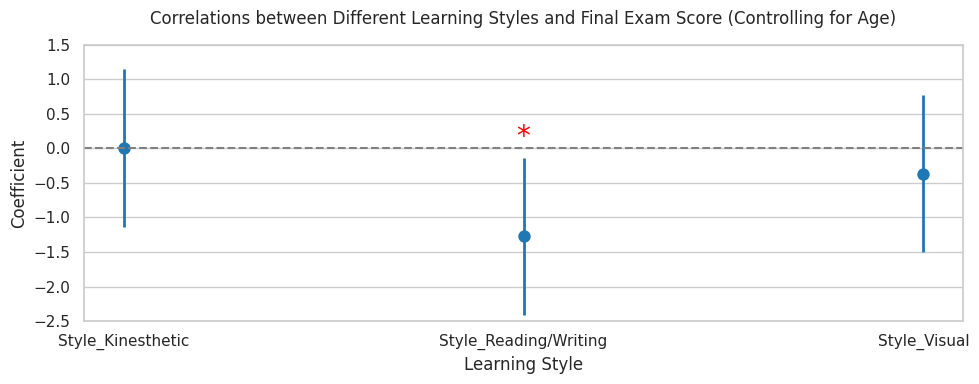

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

age_data = [
    {'Variable': 'Style_Kinesthetic', 'Coefficient': 0.0116, 'Std_Err': 0.583, 'P_Value': 0.984},
    {'Variable': 'Style_Reading/Writing', 'Coefficient': -1.2746, 'Std_Err': 0.577, 'P_Value': 0.027},
    {'Variable': 'Style_Visual', 'Coefficient': -0.3652, 'Std_Err': 0.578, 'P_Value': 0.528}
]

age_df = pd.DataFrame(age_data)
age_df['CI_lower'] = age_df['Coefficient'] - 1.96*age_df['Std_Err']
age_df['CI_upper'] = age_df['Coefficient'] + 1.96*age_df['Std_Err']


plt.figure(figsize=(10, 4))
sns.pointplot(data=age_df, x='Variable', y='Coefficient',
             join=False, color='#1f77b4', markers='o', scale=1.2)
plt.errorbar(x=range(len(age_df)), y=age_df['Coefficient'],
             yerr=(age_df['Coefficient'] - age_df['CI_lower']),
             fmt='none', c='#1f77b4', linewidth=2)


for i, p in enumerate(age_df['P_Value']):
    if p < 0.05:
        plt.text(i, age_df['CI_upper'].iloc[i]+0.2, '*', ha='center', color='red', fontsize=20)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Correlations between Different Learning Styles and Final Exam Score (Controlling for Age)", pad=15)
plt.xlabel('Learning Style')
plt.ylabel('Coefficient')
plt.ylim(-2.5, 1.5)
plt.tight_layout()
plt.show()

<ipython-input-78-8ec7e806ce04>:14: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=gender_df, x='Variable', y='Coefficient',
<ipython-input-78-8ec7e806ce04>:14: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=gender_df, x='Variable', y='Coefficient',


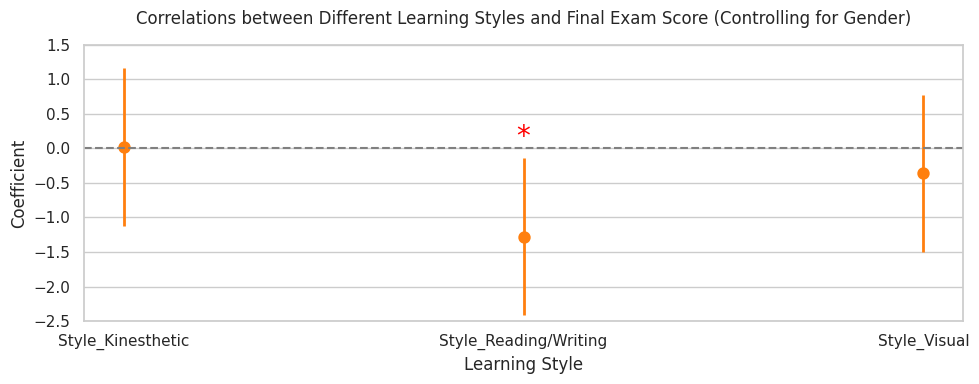

In [ ]:

gender_data = [
    {'Variable': 'Style_Kinesthetic', 'Coefficient': 0.0163, 'Std_Err': 0.583, 'P_Value': 0.978},
    {'Variable': 'Style_Reading/Writing', 'Coefficient': -1.2766, 'Std_Err': 0.577, 'P_Value': 0.027},
    {'Variable': 'Style_Visual', 'Coefficient': -0.3628, 'Std_Err': 0.578, 'P_Value': 0.530}
]

gender_df = pd.DataFrame(gender_data)
gender_df['CI_lower'] = gender_df['Coefficient'] - 1.96*gender_df['Std_Err']
gender_df['CI_upper'] = gender_df['Coefficient'] + 1.96*gender_df['Std_Err']


plt.figure(figsize=(10, 4))
sns.pointplot(data=gender_df, x='Variable', y='Coefficient',
             join=False, color='#ff7f0e', markers='o', scale=1.2)
plt.errorbar(x=range(len(gender_df)), y=gender_df['Coefficient'],
             yerr=(gender_df['Coefficient'] - gender_df['CI_lower']),
             fmt='none', c='#ff7f0e', linewidth=2)

for i, p in enumerate(gender_df['P_Value']):
    if p < 0.05:
        plt.text(i, gender_df['CI_upper'].iloc[i]+0.2, '*', ha='center', color='red', fontsize=20)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Correlations between Different Learning Styles and Final Exam Score (Controlling for Gender)", pad=15)
plt.xlabel('Learning Style')
plt.ylabel('Coefficient')
plt.ylim(-2.5, 1.5)
plt.tight_layout()
plt.show()

<ipython-input-79-d7cb25b3b4dc>:14: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=engagement_df, x='Variable', y='Coefficient',
<ipython-input-79-d7cb25b3b4dc>:14: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=engagement_df, x='Variable', y='Coefficient',


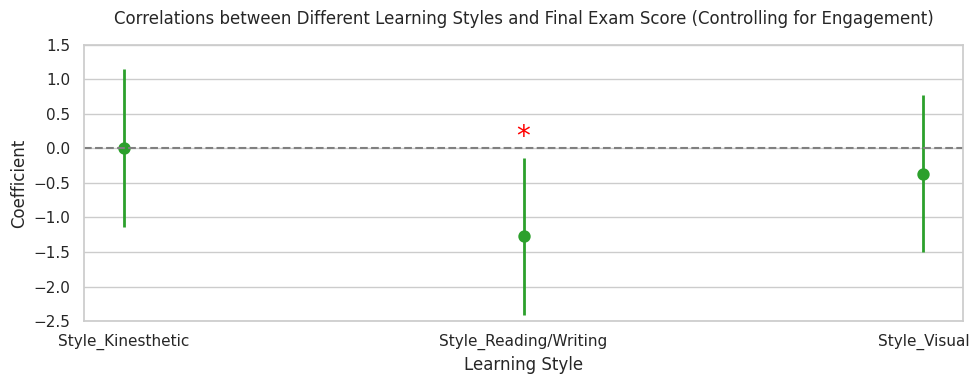

In [ ]:

engagement_data = [
    {'Variable': 'Style_Kinesthetic', 'Coefficient': 0.0112, 'Std_Err': 0.583, 'P_Value': 0.985},
    {'Variable': 'Style_Reading/Writing', 'Coefficient': -1.2753, 'Std_Err': 0.577, 'P_Value': 0.027},
    {'Variable': 'Style_Visual', 'Coefficient': -0.3633, 'Std_Err': 0.578, 'P_Value': 0.530}
]

engagement_df = pd.DataFrame(engagement_data)
engagement_df['CI_lower'] = engagement_df['Coefficient'] - 1.96*engagement_df['Std_Err']
engagement_df['CI_upper'] = engagement_df['Coefficient'] + 1.96*engagement_df['Std_Err']


plt.figure(figsize=(10, 4))
sns.pointplot(data=engagement_df, x='Variable', y='Coefficient',
             join=False, color='#2ca02c', markers='o', scale=1.2)
plt.errorbar(x=range(len(engagement_df)), y=engagement_df['Coefficient'],
             yerr=(engagement_df['Coefficient'] - engagement_df['CI_lower']),
             fmt='none', c='#2ca02c', linewidth=2)

for i, p in enumerate(engagement_df['P_Value']):
    if p < 0.05:
        plt.text(i, engagement_df['CI_upper'].iloc[i]+0.2, '*', ha='center', color='red', fontsize=20)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Correlations between Different Learning Styles and Final Exam Score (Controlling for Engagement)", pad=15)
plt.xlabel('Learning Style')
plt.ylabel('Coefficient')
plt.ylim(-2.5, 1.5)
plt.tight_layout()
plt.show()

<ipython-input-80-4b0fdc348fa7>:14: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=time_df, x='Variable', y='Coefficient',
<ipython-input-80-4b0fdc348fa7>:14: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=time_df, x='Variable', y='Coefficient',


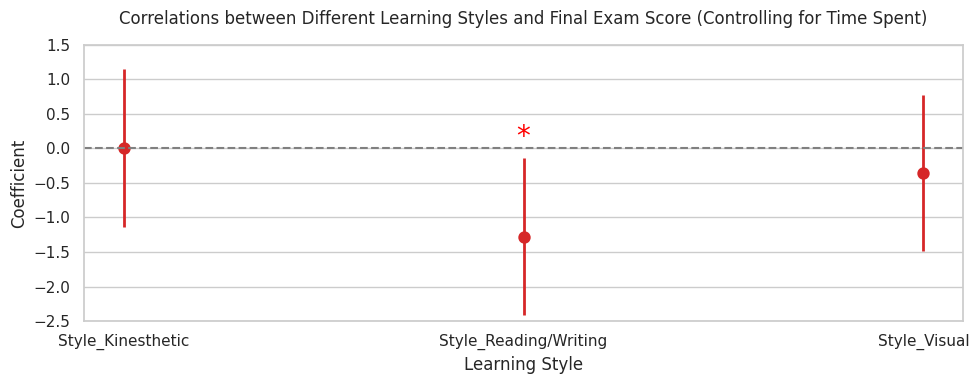

In [ ]:

time_data = [
    {'Variable': 'Style_Kinesthetic', 'Coefficient': 0.0050, 'Std_Err': 0.583, 'P_Value': 0.993},
    {'Variable': 'Style_Reading/Writing', 'Coefficient': -1.2757, 'Std_Err': 0.577, 'P_Value': 0.027},
    {'Variable': 'Style_Visual', 'Coefficient': -0.3560, 'Std_Err': 0.578, 'P_Value': 0.538}
]

time_df = pd.DataFrame(time_data)
time_df['CI_lower'] = time_df['Coefficient'] - 1.96*time_df['Std_Err']
time_df['CI_upper'] = time_df['Coefficient'] + 1.96*time_df['Std_Err']


plt.figure(figsize=(10, 4))
sns.pointplot(data=time_df, x='Variable', y='Coefficient',
             join=False, color='#d62728', markers='o', scale=1.2)
plt.errorbar(x=range(len(time_df)), y=time_df['Coefficient'],
             yerr=(time_df['Coefficient'] - time_df['CI_lower']),
             fmt='none', c='#d62728', linewidth=2)

for i, p in enumerate(time_df['P_Value']):
    if p < 0.05:
        plt.text(i, time_df['CI_upper'].iloc[i]+0.2, '*', ha='center', color='red', fontsize=20)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Correlations between Different Learning Styles and Final Exam Score (Controlling for Time Spent)", pad=15)
plt.xlabel('Learning Style')
plt.ylabel('Coefficient')
plt.ylim(-2.5, 1.5)
plt.tight_layout()
plt.show()

### 4. Self-defined Research Questions



#### I. Is there a significant relationship between video time and final score for students with different learning behavior patterns?



In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest


threshold_assign = df['Assignment_Completion_Rate'].median()
threshold_engage = df['Engagement_Level_Ordinal'].median()


def classify_group(row):
    if row['Assignment_Completion_Rate'] < threshold_assign and row['Engagement_Level_Ordinal'] < threshold_engage:
        return 'Disengaged Type'
    elif row['Assignment_Completion_Rate'] >= threshold_assign and row['Engagement_Level_Ordinal'] >= threshold_engage:
        return 'Active Type'
    elif row['Assignment_Completion_Rate'] >= threshold_assign and row['Engagement_Level_Ordinal'] < threshold_engage:
        return 'Efficient Completer'
    elif row['Assignment_Completion_Rate'] < threshold_assign and row['Engagement_Level_Ordinal'] >= threshold_engage:
        return 'Independent Explorer'

df['Student_Type'] = df.apply(classify_group, axis=1)


group_counts = df.groupby('Student_Type')['Dropout_Likelihood'].value_counts().unstack().fillna(0)
group_counts['Total'] = group_counts['Yes'] + group_counts['No']
group_counts['Dropout_Rate'] = group_counts['Yes'] / group_counts['Total']
print(group_counts[['Yes', 'No', 'Dropout_Rate']])


dropout_yes = np.array([
    group_counts.loc['Disengaged Type', 'Yes'],
    group_counts.drop('Disengaged Type').sum()['Yes']
])
dropout_total = np.array([
    group_counts.loc['Disengaged Type', 'Total'],
    group_counts.drop('Disengaged Type').sum()['Total']
])


stat, pval = proportions_ztest(dropout_yes, dropout_total)
print(f"Disengaged Type vs other group：z = {stat:.3f}, p = {pval:.4f}")

Dropout_Likelihood    Yes    No  Dropout_Rate
Student_Type                                 
Active Type           761  3171      0.193540
Disengaged Type       164   808      0.168724
Efficient Completer   199   830      0.193392
Independent Explorer  760  2892      0.208105
Disengaged Type vs other group：z = -2.303, p = 0.0213


Visualization: Student Type Distribution

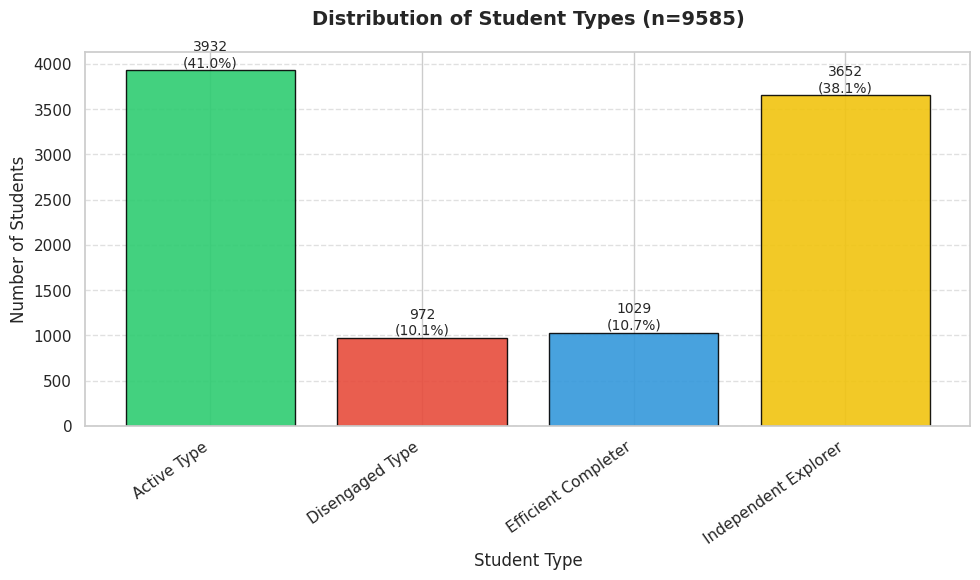

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams.update({
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})

palette = {
    'Disengaged Type': '#e74c3c',
    'Active Type': '#2ecc71',
    'Efficient Completer': '#3498db',
    'Independent Explorer': '#f1c40f'
}


type_dist = df['Student_Type'].value_counts().sort_index()


fig, ax = plt.subplots(figsize=(10, 6))


bars = ax.bar(type_dist.index, type_dist.values,
             color=[palette[t] for t in type_dist.index],
             edgecolor='black', alpha=0.9, zorder=2)


for bar in bars:
    height = bar.get_height()
    percentage = height / len(df) * 100
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
           f'{height}\n({percentage:.1f}%)',
           ha='center', va='bottom', fontsize=10)


plt.title('Distribution of Student Types (n={})'.format(len(df)),
         pad=20, fontweight='bold')
plt.xlabel('Student Type')
plt.ylabel('Number of Students')
plt.xticks(rotation=35, ha='right')
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

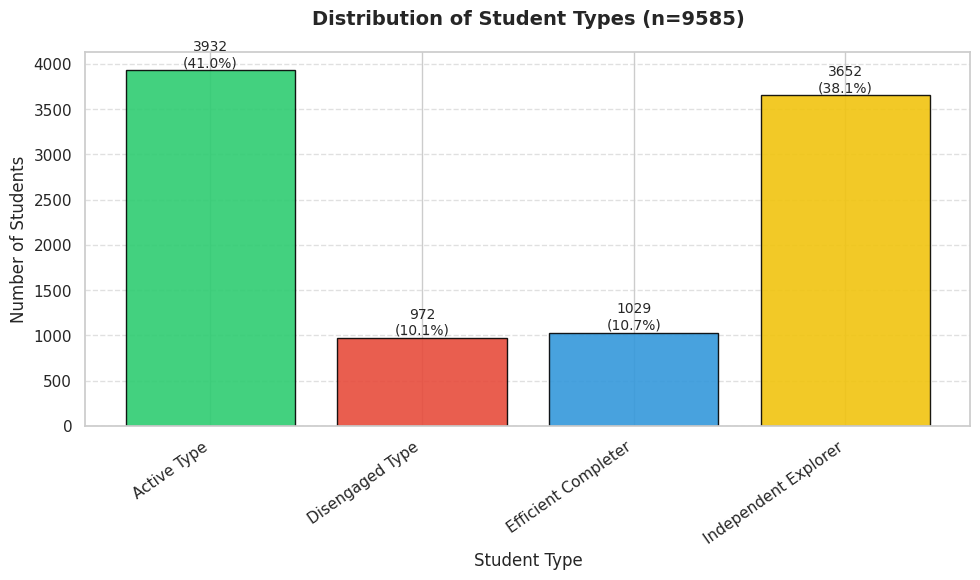

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams.update({
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})

palette = {
    'Disengaged Type': '#e74c3c',
    'Active Type': '#2ecc71',
    'Efficient Completer': '#3498db',
    'Independent Explorer': '#f1c40f'
}

# Calculation type distribution
type_dist = df['Student_Type'].value_counts().sort_index()

# creating the figure
fig, ax = plt.subplots(figsize=(10, 6))

# draw bar chart
bars = ax.bar(type_dist.index, type_dist.values,
             color=[palette[t] for t in type_dist.index],
             edgecolor='black', alpha=0.9, zorder=2)

# add data label
for bar in bars:
    height = bar.get_height()
    percentage = height / len(df) * 100
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
           f'{height}\n({percentage:.1f}%)',
           ha='center', va='bottom', fontsize=10)

# improve the layout
plt.title('Distribution of Student Types (n={})'.format(len(df)),
         pad=20, fontweight='bold')
plt.xlabel('Student Type')
plt.ylabel('Number of Students')
plt.xticks(rotation=35, ha='right')
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

<ipython-input-83-d11eba9f4e04>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


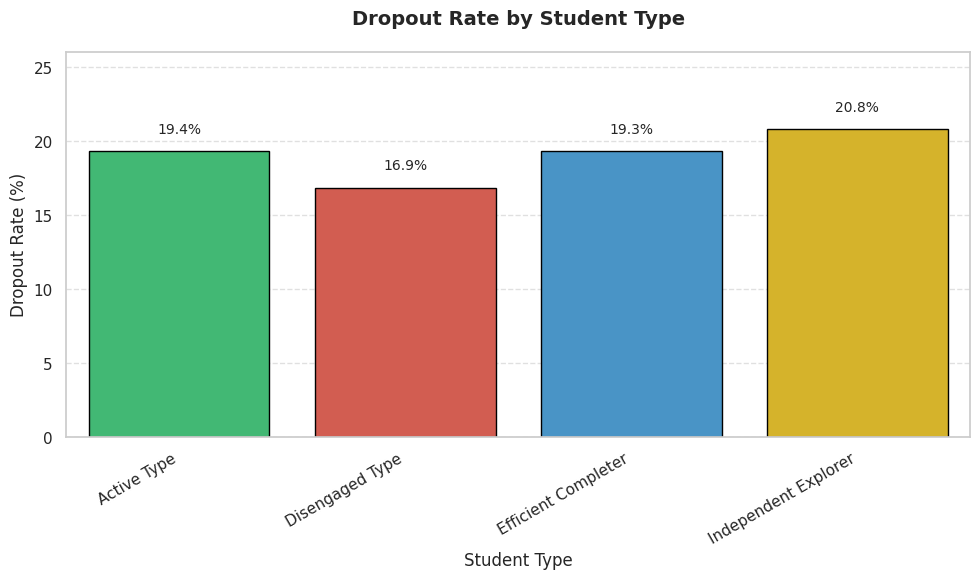

In [ ]:
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams.update({
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})


palette = {
    'Disengaged Type': '#e74c3c',
    'Active Type': '#2ecc71',
    'Efficient Completer': '#3498db',
    'Independent Explorer': '#f1c40f'
}


group_counts = df.groupby('Student_Type')['Dropout_Likelihood'].value_counts().unstack().fillna(0)
group_counts['Total'] = group_counts['Yes'] + group_counts['No']
group_counts['Dropout_Rate'] = group_counts['Yes'] / group_counts['Total'] * 100

dropout_df = group_counts[['Dropout_Rate']].reset_index()


fig, ax = plt.subplots(figsize=(10, 6))
bars = sns.barplot(
    data=dropout_df,
    x='Student_Type',
    y='Dropout_Rate',
    palette=palette,
    ax=ax,
    edgecolor='black'
)


for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )


ax.set_title('Dropout Rate by Student Type', pad=20, fontweight='bold')
ax.set_xlabel('Student Type')
ax.set_ylabel('Dropout Rate (%)')
ax.set_ylim(0, max(dropout_df['Dropout_Rate']) * 1.25)
plt.xticks(rotation=30, ha='right')
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Step 1: Prepare the data (make sure there are no missing values)
df_score = df[['Student_Type', 'Final_Exam_Score']].dropna().copy()

# Step 2: Check average value of each group
group_means = df_score.groupby('Student_Type')['Final_Exam_Score'].mean()
print("The average final grades of each type of students：\n", group_means)

# Step 3: Performing an ANOVA test
model = smf.ols('Final_Exam_Score ~ C(Student_Type)', data=df_score).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nANOVA result：")
print(anova_table)

# Step 4: Tukey HSD multiple comparisons
print("\nTukey HSD post hoc test results (all group comparisons：")
tukey = pairwise_tukeyhsd(endog=df_score['Final_Exam_Score'],
                          groups=df_score['Student_Type'],
                          alpha=0.05)
print(tukey)



The average final grades of each type of students：
 Student_Type
Active Type             65.136317
Disengaged Type         63.736626
Efficient Completer     64.935860
Independent Explorer    64.532037
Name: Final_Exam_Score, dtype: float64

ANOVA result：
                       sum_sq      df         F    PR(>F)
C(Student_Type)  1.793512e+03     3.0  1.488196  0.215544
Residual         3.848875e+06  9581.0       NaN       NaN

Tukey HSD post hoc test results (all group comparisons：
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2        meandiff p-adj   lower  upper  reject
------------------------------------------------------------------------------
        Active Type      Disengaged Type  -1.3997 0.2075 -3.2445 0.4451  False
        Active Type  Efficient Completer  -0.2005 0.9919 -2.0038 1.6029  False
        Active Type Independent Explorer  -0.6043 0.5553 -1.7878 0.5793  False
    Disengaged Type  Efficient Completer

#### II.Is there a significant relationship between video time and final score for students with different learning styles?

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf


df_ls = df[['Time_Spent_on_Videos', 'Learning_Style', 'Final_Exam_Score']].dropna().copy()
results = []
styles = ['Visual', 'Auditory', 'Reading/Writing', 'Kinesthetic']

# Modeling Every Learning Style
for style in styles:
    sub_df = df_ls[df_ls['Learning_Style'] == style]
    model = smf.ols('Final_Exam_Score ~ Time_Spent_on_Videos', data=sub_df).fit()


    conf_int = model.conf_int().loc['Time_Spent_on_Videos']

   # Extract key information
    results.append({
        'Learning_Style': style,
        'Coef_Time_Spent_on_Videos': model.params['Time_Spent_on_Videos'],
        'CI_lower': conf_int[0],
        'CI_upper': conf_int[1],
        'P_Value': model.pvalues['Time_Spent_on_Videos'],
        'R_squared': model.rsquared,
        'N': len(sub_df)
    })

summary_df = pd.DataFrame(results)
summary_df = summary_df.round({
    'Coef_Time_Spent_on_Videos': 4,
    'CI_lower': 4,
    'CI_upper': 4,
    'P_Value': 4,
    'R_squared': 4
})

print("Four learning styles: Summary of regression results of video time on grades")
print(summary_df[['Learning_Style', 'Coef_Time_Spent_on_Videos',
                'CI_lower', 'CI_upper', 'P_Value', 'R_squared', 'N']])

Four learning styles: Summary of regression results of video time on grades
    Learning_Style  Coef_Time_Spent_on_Videos  CI_lower  CI_upper  P_Value  \
0           Visual                    -0.0014   -0.0071    0.0042   0.6193   
1         Auditory                     0.0008   -0.0049    0.0064   0.7915   
2  Reading/Writing                    -0.0083   -0.0140   -0.0026   0.0042   
3      Kinesthetic                     0.0048   -0.0010    0.0106   0.1026   

   R_squared     N  
0     0.0001  2417  
1     0.0000  2389  
2     0.0034  2436  
3     0.0011  2343  


Visualization：Correlation between video time and final Scores among different learing styles

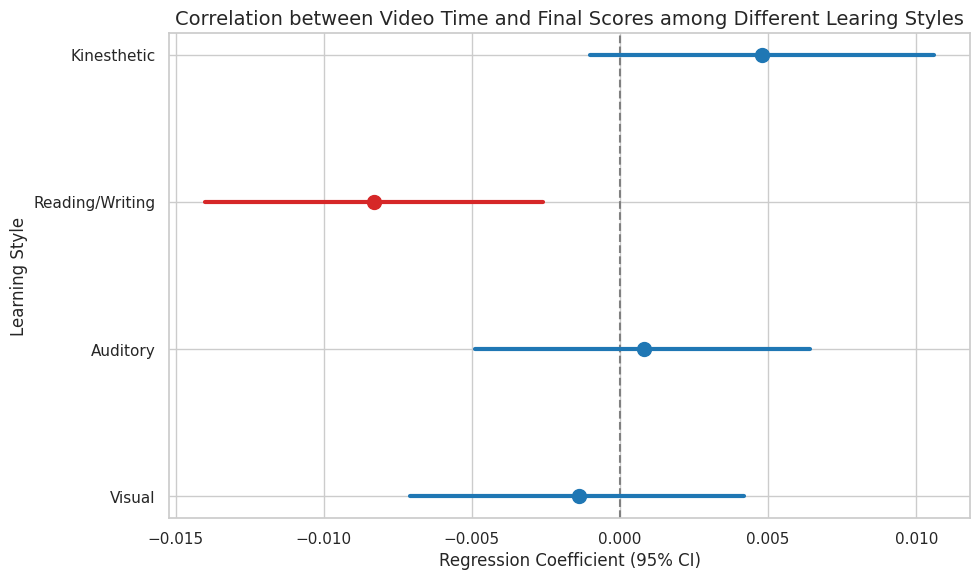

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.axvline(0, color='gray', linestyle='--')

for i, row in summary_df.iterrows():
    color = '#d62728' if row['P_Value'] < 0.05 else '#1f77b4'
    plt.plot([row['CI_lower'], row['CI_upper']], [i, i], color=color, lw=3)
    plt.plot(row['Coef_Time_Spent_on_Videos'], i, 'o', color=color, markersize=10)

plt.yticks(range(len(summary_df)), summary_df['Learning_Style'])
plt.xlabel('Regression Coefficient (95% CI)')
plt.ylabel('Learning Style')
plt.title('Correlation between Video Time and Final Scores among Different Learing Styles')
plt.tight_layout()
plt.show()

#### III. Are certain courses suitable for students with certain learning styles?

In [ ]:
group_mean = df.groupby(['Course_Name', 'Learning_Style'])['Final_Exam_Score'].mean().unstack()
print(group_mean.round(2))

Learning_Style    Auditory  Kinesthetic  Reading/Writing  Visual
Course_Name                                                     
Cybersecurity        64.37        65.09            64.72   65.30
Data Science         65.16        65.41            62.50   65.30
Machine Learning     65.14        63.78            63.44   65.34
Python Basics        66.43        64.98            64.59   63.70
Web Development      64.77        66.61            64.25   64.33


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


model = smf.ols('Final_Exam_Score ~ C(Course_Name) * C(Learning_Style)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                        sum_sq      df         F    PR(>F)
C(Course_Name)                    3.897733e+02     4.0  0.242577  0.914257
C(Learning_Style)                 2.614605e+03     3.0  2.169613  0.089388
C(Course_Name):C(Learning_Style)  5.368094e+03    12.0  1.113618  0.343352
Residual                          3.842267e+06  9565.0       NaN       NaN
